# Table of contents

> ## Table of contents
> ## Introduction
> ## Exploratory Data Analysis
> ## Cleaning the data
> ## Encoding
> ## Dropping irrelevant data, and modifying the remainder
> ## Analysis
> ## Conclusion


# Introduction


>### I was given a task that entailed a standard data engineering workflow to understand the factors that drove the occurrence of a certain phenomenon - high app ratings for apps on the Google Play Store. In particular, there were 6 objectives I had to accomplish: 
1.	Go through the files and load them as dataframes in a Jupyter Notebook.
2.	Do an Exploratory Data Analysis to understand the data.
3.	See what factors influence the rating of an app.
4.	Understand different variables and their interdependence using univariate and bivariate analysis .
5.	Use good visualizations wherever necessary and create a story out of the Jupyter notebook to understand how the rating of any app is affected based on various factors.
6.	Make sure the Jupyter Notebook is clean and tidy use html markdowns to make it more user friendly.

### The contents of this notebook comprise of my solution to the task I was assigned.


# Exploratory Data Analysis

**The purpose of this notebook is to shed some light on the factors that drive users to rate an app highly.**

**I was given 2 CSVs - one that contained technical data, and the other had sentiment data. The data in both CSVs pertains to apps published on the Google Play Store.**

In [107]:
#importing required libraries
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pylab import rcParams
import time
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
start = time.time()

#mounting my google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [108]:
#reading csv files
appData = pd.read_csv(r"/content/gdrive/MyDrive/Dataset/googleplaystore.csv")
appSents = pd.read_csv(r"/content/gdrive/MyDrive/Dataset/googleplaystore_user_reviews.csv")

In [109]:
#printing first few rows
appData.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [110]:
#~10k rows, 13 columns
appData.shape

(10841, 13)

In [111]:
#print a summary of appData
appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [112]:
#desc stats
appData.describe

<bound method NDFrame.describe of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTY

In [113]:
#looking at how many unique categories there are in the dataframe, because I will impute missing data category-wise
print("There are ", appData['Category'].nunique(), " unique categories. They are \n", appData['Category'].unique()) 

There are  34  unique categories. They are 
 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


Text(0.5, 1.0, 'Ratings Distribution')

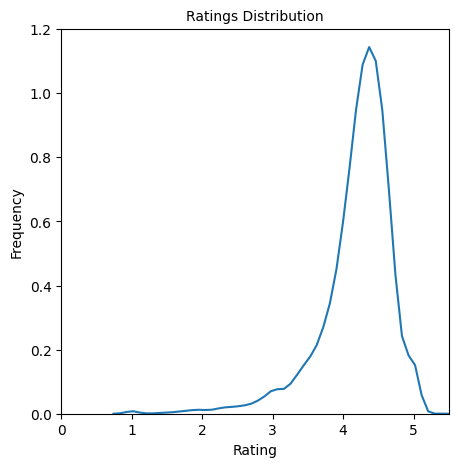

In [114]:
#distribution of ratings
rcParams['figure.figsize'] = 5, 5
ratingPlot = sns.kdeplot(appData.Rating)
ratingPlot.set_xlabel('Rating')
ratingPlot.set_ylabel('Frequency')
plt.xlim(0, 5.5) #set limit on x axis
plt.title('Ratings Distribution', size = 10)



**It looks like that the highest number of ratings fall somewhere between 3.8 and 4.3.**

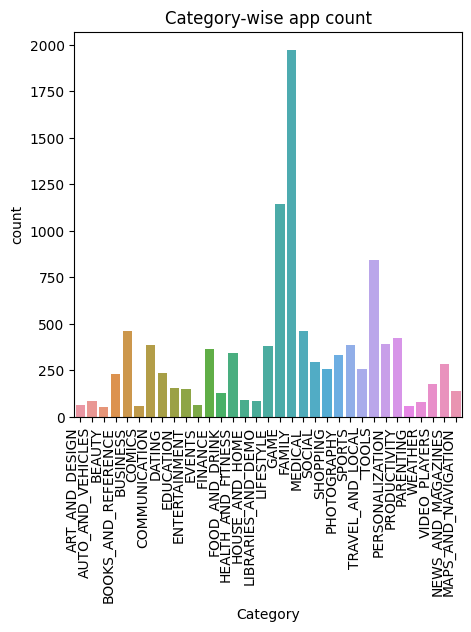

<Figure size 1200x800 with 0 Axes>

In [115]:
appData = appData.drop(appData.index[10472]) 

#count of apps category-wise
catWiseApp = sns.countplot(x = 'Category', data = appData)
catWiseApp.set_xticklabels(catWiseApp.get_xticklabels(), rotation = 90, ha = "right")
plt.title('Category-wise app count')
plt.figure(figsize = (12, 8))
plt.show()


**This chart isn't informative enough. I'll use a pie chart.**

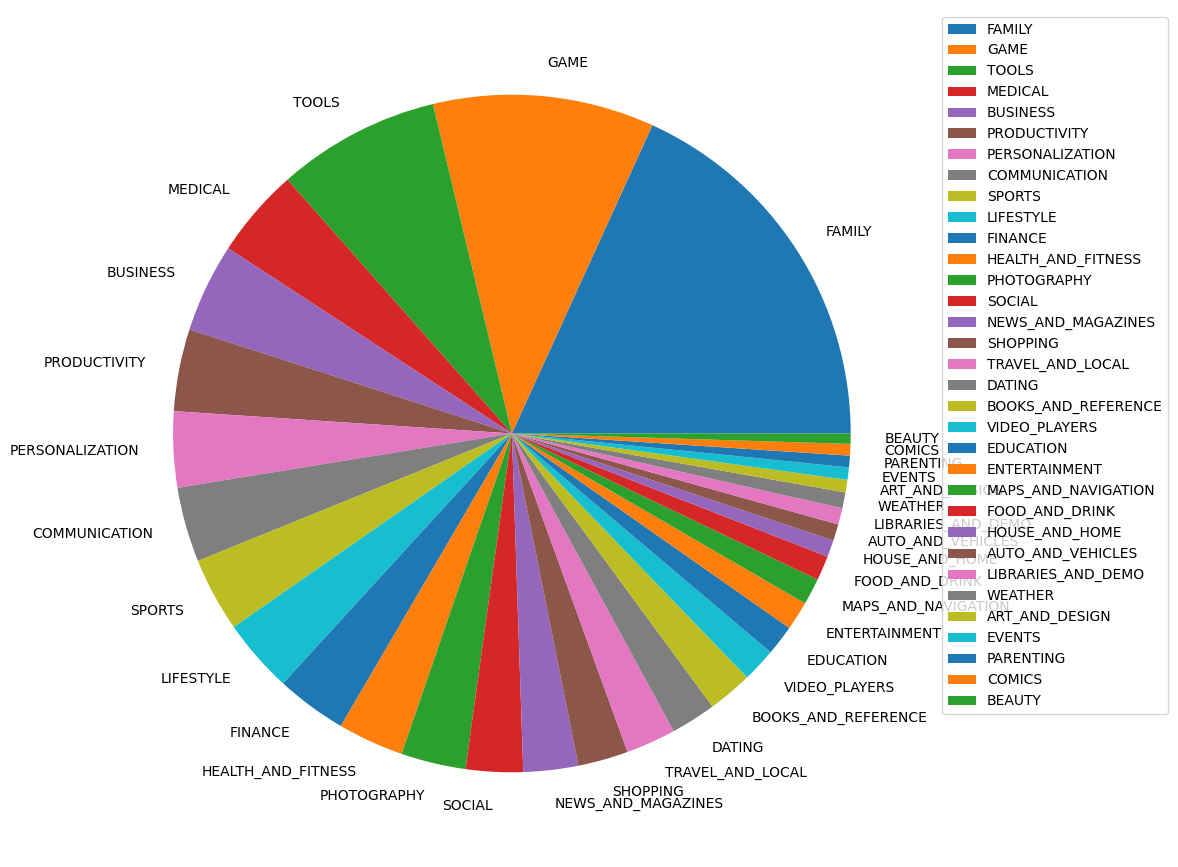

In [116]:
plt.figure(figsize = (11, 11))
catcounts = appData['Category'].value_counts()
plt.pie(catcounts, labels = catcounts.index, labeldistance = 1.1) 
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

In [117]:
appSents.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


**There are multiple reviews for a single app. It looks like this data is quite thorough and comprehensive.**

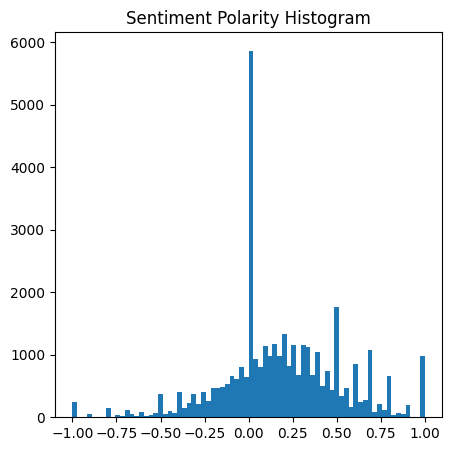

In [118]:
#distribution of sentiment polarity
plt.hist(appSents['Sentiment_Polarity'], bins=74)
plt.xlabel = ('Polarity')
plt.ylabel = ('Frequency')
plt.title('Sentiment Polarity Histogram')
plt.show()


**Sentiments with positive polarity have a count higher that than sentiments with negative polarity.**

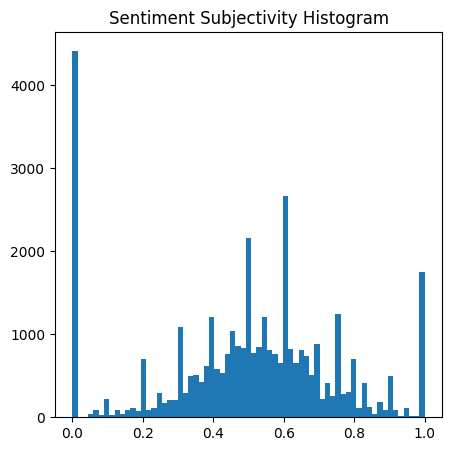

In [119]:
#distribution of sentiment subjectivity
plt.hist(appSents['Sentiment_Subjectivity'], bins = 67)
plt.xlabel = ('Subjectivity')
plt.ylabel = ('Frequency')
plt.title('Sentiment Subjectivity Histogram')
plt.show()


**The subjectivity of the reviews is quite widespread.**

In [120]:
appSents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


**I'm not going to alter outliers. Based on my understanding of polarity, I think it is inherently supposed to exhibit variability, the validity of which the presence of such a dense group of outliers confirms.**

In [121]:
appSents.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


**Before I can start working with this data, I need to clean it, encode it, manipulate it and make it easier to work with in general.**

#Cleaning the data

**Removing strings from columns that I want in numeric format. I will deal with the size column later.**

In [122]:
for mems in ['Installs', 'Price']:
    for char in [',', '$', '+']:
        appData[mems] = appData[mems].str.replace(char, '')
    # Convert col to numeric
    appData[mems] = pd.to_numeric(appData[mems])


<ipython-input-122-23b5e2734e6d>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  appData[mems] = appData[mems].str.replace(char, '')


**Now, time to check for missing values and deal with duplicates.**

In [123]:
appData.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

**Quite a lot of null values.**

In [124]:
appData.duplicated().sum()


483

**And quite a lot of duplicate values.**


**There are no null values in the App column, so dropping any duplicates on the basis of that column would be paramount to dropping duplicates in other columns as well.**

In [125]:
#drop duplicates and keep the last occurrence of any duplicate row
appData.drop_duplicates('App', keep = 'last', inplace = True)

In [126]:
appData.duplicated().sum()

0

**0 duplicates left.**

In [127]:
appData.shape

(9659, 13)

In [128]:
appData.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

**That took care of some null values, but not nearly enough.**

**Now there's one problem: there are 1,463 rows in the rating column which have missing values. I cannot discard 1,458 rows because that would amount to too big of a loss, in terms of secondary and tertiary information.**

**However, it would be prudent to drop apps that don't have a significant number of installs or written reviews, as it wouldn't be a loss of any significant data.**



**However, I can't impute the Rating column with just any value. I will impute it with the mean if the standard deviation is low, and with the mode if the standard deviation is high.**

In [129]:
#group rows by the 'Category' column and calculate standard deviation for the 'Rating' column
appData.groupby('Category')['Rating'].std()


Category
ART_AND_DESIGN         0.359654
AUTO_AND_VEHICLES      0.543692
BEAUTY                 0.362603
BOOKS_AND_REFERENCE    0.437649
BUSINESS               0.660393
COMICS                 0.526317
COMMUNICATION          0.469343
DATING                 0.628907
EDUCATION              0.269672
ENTERTAINMENT          0.341185
EVENTS                 0.419499
FAMILY                 0.515404
FINANCE                0.659147
FOOD_AND_DRINK         0.567890
GAME                   0.387936
HEALTH_AND_FITNESS     0.669994
HOUSE_AND_HOME         0.376110
LIBRARIES_AND_DEMO     0.381504
LIFESTYLE              0.704951
MAPS_AND_NAVIGATION    0.527316
MEDICAL                0.690971
NEWS_AND_MAGAZINES     0.566578
PARENTING              0.517845
PERSONALIZATION        0.358968
PHOTOGRAPHY            0.494197
PRODUCTIVITY           0.534281
SHOPPING               0.444469
SOCIAL                 0.457209
SPORTS                 0.461790
TOOLS                  0.619471
TRAVEL_AND_LOCAL       0.532070

**App ratings on the Play Store range from 0 to 5, so the standard deviation for each category is relatively high. I will use the mode of each category to impute values, category-wise.**

**While this isn't the best course of action, additional data can neither be sourced nor estimated, and 1,458 rows cannot be dropped.**

In [130]:
appData['Rating'].isnull().sum()

1463

In [131]:
'''
groups rows by category, because cross-category mode wouldn't be prudent
rating in brackets to ensure it is in focus
aggregation function that makes use of a lambda function to calculate the mode of
each group and return the first mode
x's mode, and the first mode is returned to work against dupes
'''
ratingModes = appData.groupby('Category')['Rating'].agg(lambda x: x.mode().values[0]) #a series that holds all modes

In [132]:
'''
select rating column from appData
apply a lambda function to it, param row
row's rating returned if not null, if null, mode is retrieved from ratingModes series and filled
axis = 1 ensures columns aren't tampered with and rows are "tampered" with
'''
appData['Rating'] = appData.apply(lambda row: row['Rating'] if pd.notnull(row['Rating']) else ratingModes[row['Category']], axis=1)

In [133]:
appData['Rating'].isnull().sum()

0

In [134]:
appData.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [135]:
appData.dropna(inplace = True)

In [136]:
appData.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**Great, that takes care of null values in the first data frame.**



In [137]:
appSents

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


**Dropping the Sentiment column's NaN values should take care of the majority of the NaN values in the dataframe. I cannot impute those values feasibly. Also, there are a large number of rows, so there is quite a lot of information left to work with.**

In [138]:
appSents.dropna(subset = ['Sentiment'], inplace = True) #drop NaNs in the Sentiment column
appSents.dropna(subset = ['Translated_Review'], inplace = True) #drop NaNs in the Translated_Review column

In [139]:
appSents.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [140]:
#"grouping" the rows by category for better readability
appData.sort_values('Category', inplace = True)
appData.reset_index(drop = True, inplace = True)


**First, time to deal with the Size column. How do I deal with the "varies with device" value? I'll do what I did for the Rating column's NaN values.**

In [141]:
appData.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.8,564,9.2M,100000,Free,0.0,Everyone,Art & Design,"July 11, 2018",2.1,4.1 and up
2,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,5000000,Free,0.0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up


In [142]:
#a function that converts KBs in the Size column to MBs 
def k2m(size):
    if isinstance(size, str): #checks if current size row is a string
        if size.endswith('k'):
            return round(float(size[:-1]) / 1024, 1)  #convert kb to mb, precision of 1
        elif size.endswith('M'):
            return float(size[:-1])
    return size

In [143]:
appData['Size'] = appData['Size'].apply(k2m)

In [144]:
#force 'varies with device' rows to int
appData['Size'] = pd.to_numeric(appData['Size'], errors='coerce')

In [145]:
appData['Size'].isna().sum()

1226

In [146]:
appData.groupby('Category')['Size'].std()


Category
ART_AND_DESIGN          9.871001
AUTO_AND_VEHICLES      20.215500
BEAUTY                 12.946948
BOOKS_AND_REFERENCE    15.230970
BUSINESS               15.393503
COMICS                 11.011365
COMMUNICATION          12.459511
DATING                 14.115890
EDUCATION              18.944856
ENTERTAINMENT          19.172780
EVENTS                 13.013353
FAMILY                 25.822594
FINANCE                18.183466
FOOD_AND_DRINK         14.653416
GAME                   26.959470
HEALTH_AND_FITNESS     20.913215
HOUSE_AND_HOME         16.287071
LIBRARIES_AND_DEMO     17.985092
LIFESTYLE              15.632566
MAPS_AND_NAVIGATION    16.111806
MEDICAL                18.307962
NEWS_AND_MAGAZINES     10.659447
PARENTING              25.591317
PERSONALIZATION        13.001445
PHOTOGRAPHY            16.036770
PRODUCTIVITY           13.762186
SHOPPING               13.923924
SOCIAL                 19.513026
SPORTS                 22.209668
TOOLS                  11.300623
T

**The standard deviation varies wildly across all categories, and the categories where it isn't super high are too few in number to replace NaNs with the mean, so I'll replace the 'varies with device'/NaN values with the mode.**


In [147]:
sizeModes = appData.groupby('Category')['Size'].agg(lambda x: x.mode().values[0])
appData['Size'] = appData.apply(lambda row: row['Size'] if pd.notnull(row['Size']) else sizeModes[row['Category']], axis=1)

In [148]:
appData['Size'].isna().sum()

0

In [149]:
appData.shape

(9648, 13)

In [150]:
appData['Installs'].unique()

array([     10000,     100000,    5000000,     500000,   10000000,
             5000,       1000,      50000,        100,          0,
          1000000,   50000000,          1,        500,         10,
               50,          5,  100000000, 1000000000,  500000000])

**Now, time to encode the installs column. I used the snippet below to assign a value to an app based on how many installs it garnered.**

In [151]:
#100, 1k, 10k, 100k, 1m, 10m, 100m+
for i, row in appData.iterrows():
  if row['Installs'] == 0:
    appData.loc[i, 'Installs'] = 0
  elif 0 < row['Installs'] < 100:
    appData.loc[i, 'Installs'] = 1
  elif 100 < row['Installs'] < 1000:
    appData.loc[i, 'Installs'] = 2
  elif 1000 < row['Installs'] < 10000:
    appData.loc[i, 'Installs'] = 3
  elif 10000 < row['Installs'] < 100000:
    appData.loc[i, 'Installs'] = 4
  elif 100000 < row['Installs'] < 1000000:
    appData.loc[i, 'Installs'] = 5
  elif 1000000 < row['Installs'] < 10000000:
    appData.loc[i, 'Installs'] = 6
  else:
    appData.loc[i, 'Installs'] = 7
  

**Now, the type column. I'll replace free with 0, and paid with 1.**

In [152]:
#use a dictionary as a map to refer what to use to replace a value with which number
appData['Type'] = appData['Type'].replace({'Free': 0, 'Paid': 1})

**However, this column wouldn't be informative enough if it were used on its own. Paid apps have a different connotation attached to them, and must be looked at in a different light. I will use dummy encoding to separate this information.**

In [153]:
#prefix param gets added to the name of the column along with _dummyname
appData = pd.concat([appData, pd.get_dummies(appData['Type'], prefix = 'Type = ')], axis = 1)

**Now, the content rating column.**

In [154]:
appData['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

**Obviously, these values follow a hierarchy. It makes sense to encode them in a manner that respects that hierarchy, going from Unrated < Everyone < Everyone 10+ < Teen < Mature 17+ < Adults only 18+.** 


In [155]:
appData['Content Rating'] = appData['Content Rating'].map({'Unrated' : 0, 'Everyone' : 1, 'Everyone 10+' : 2, 'Teen' : 3, 'Mature 17+' : 4, 'Adults only 18+' : 5})

**Then, the last updated column.**

**How do I use time? It isn't in the form of an interval, it's a solid, concrete date that tells me when a particular app was updated the last time.**

**I cannot see how app installs changed over time.**

**I will create a new metric called 'Recency'. I will grab the latest 'Last Updated' date from all apps, and calculate deltas for all apps that aren't the latest. There will be 4 classes:**

**Class 0 apps are apps that are either the latest version or lagging behind by a time span of less than 1 month.**

**Class 1 apps are apps that are lagging behind by more than a month but less than 6 months.** 

**Class 2 apps are apps that are lagging behind by more than 6 months but less than a year.**

**Class 3 apps are apps that are lagging behind by more than a year.**

In [156]:
#convert time data to datetime format
appData['Last Updated'] = pd.to_datetime(appData['Last Updated'], format = '%B %d, %Y')

In [157]:
#store the latest date an app was updated in a variable
latest = appData['Last Updated'].max() 

In [158]:
#add two columns to the dataframe to facilitate the creation of the recency metric
appData['Recency'] = ''
appData['Delta'] = '' #latest date is 2018-08-08

In [159]:
#for each row, store the difference between the latest date and the date an app was updated on in the delta column
for i, row in appData.iterrows():
  appData.loc[i, 'Delta'] = (row['Last Updated'] - latest).days

In [160]:
for i, row in appData.iterrows():
  if row['Delta'] > -31:
    appData.at[i, 'Recency'] = 0
  elif -31 > row['Delta'] > -184:
    appData.at[i, 'Recency'] = 1
  elif -184 > row['Delta'] > -366:
    appData.at[i, 'Recency'] = 2
  else:
    appData.at[i, 'Recency'] = 3


In [161]:
-3 > -5

True

**Finally, encoding the sentiment column.**

In [162]:
appSents['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

**I will use -1 to represent negative sentiment, 0 for neutral sentiment, and 1 for positive sentiment.**

In [163]:
for i, rows in appSents.iterrows():
  if rows['Sentiment'] == 'Positive':
    appSents.loc[i, 'Sentiment'] = 1
  elif rows['Sentiment'] == 'Negative':
    appSents.loc[i, 'Sentiment'] = -1
  else:
    appSents.loc[i, 'Sentiment'] = 0

**However, the sentiment column isn't of much use as of now, because there are reviews for apps that have different sentiments. It is better to separate the column into three columns for a better feature space.**

**I will use dummy encoding to do this.**

In [164]:
appSents = pd.concat([appSents, pd.get_dummies(appSents['Sentiment'], prefix = 'Sen = ')], axis = 1)


<ipython-input-164-1d3f660c67fd>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  appSents = pd.concat([appSents, pd.get_dummies(appSents['Sentiment'], prefix = 'Sen = ')], axis = 1)


In [165]:
#reset index
appSents.reset_index(drop = True, inplace = True)

In [166]:
appSents

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Sen = _-1,Sen = _0,Sen = _1
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,1,1.000000,0.533333,0,0,1
1,10 Best Foods for You,This help eating healthy exercise regular basis,1,0.250000,0.288462,0,0,1
2,10 Best Foods for You,Works great especially going grocery store,1,0.400000,0.875000,0,0,1
3,10 Best Foods for You,Best idea us,1,1.000000,0.300000,0,0,1
4,10 Best Foods for You,Best way,1,1.000000,0.300000,0,0,1
...,...,...,...,...,...,...,...,...
37422,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,1,0.173333,0.486667,0,0,1
37423,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",1,0.225000,0.447222,0,0,1
37424,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",-1,-0.287500,0.250000,1,0,0
37425,Housing-Real Estate & Property,I property business got link SMS happy perform...,1,0.800000,1.000000,0,0,1


# Dropping irrelevant data, and modifying the remainder

**First, I'll merge the two dataframes.**

In [167]:
#pd.merge(df1, df2, on = 'name of common column')
appInfo = pd.merge(appData, appSents, on = 'App')

In [168]:
appInfo

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Type = _1,Recency,Delta,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Sen = _-1,Sen = _0,Sen = _1
0,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,4.2,6,0,0.0,1,Art & Design,...,0,0,-25,"I like features. It addictive! But, here's sug...",1,0.126190,0.546032,0,0,1
1,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,4.2,6,0,0.0,1,Art & Design,...,0,0,-25,This like appetizer. It potential feels thin f...,1,0.238889,0.697222,0,0,1
2,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,4.2,6,0,0.0,1,Art & Design,...,0,0,-25,"Stable app. Not intuitive, really cool learn m...",1,0.268750,0.459375,0,0,1
3,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,4.2,6,0,0.0,1,Art & Design,...,0,0,-25,"Okey, I love decorating lot. I spend time usin...",1,0.238528,0.460173,0,0,1
4,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,4.2,6,0,0.0,1,Art & Design,...,0,0,-25,"great, purchases restore switching new device?...",1,0.421591,0.601136,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35924,AccuWeather: Daily Forecast & Live Weather Rep...,WEATHER,4.4,2052407,10.0,7,0,0.0,1,Weather,...,0,0,-6,"This great last update open, force closes ever...",1,0.187273,0.454242,0,0,1
35925,AccuWeather: Daily Forecast & Live Weather Rep...,WEATHER,4.4,2052407,10.0,7,0,0.0,1,Weather,...,0,0,-6,Crashes regularly. Locks showing daily forecas...,1,0.266667,0.275641,0,0,1
35926,AccuWeather: Daily Forecast & Live Weather Rep...,WEATHER,4.4,2052407,10.0,7,0,0.0,1,Weather,...,0,0,-6,Nice easy accurate still learning take advanta...,1,0.383333,0.866667,0,0,1
35927,AccuWeather: Daily Forecast & Live Weather Rep...,WEATHER,4.4,2052407,10.0,7,0,0.0,1,Weather,...,0,0,-6,"This used really good, 7/31/18 update crashes ...",1,0.350000,0.550000,0,0,1


**Now, time to drop some columns.**



In [169]:
appInfo.drop(columns = ['Last Updated', 'Current Ver', 'Android Ver', 'Translated_Review', 'Delta'], axis = 1, inplace = True)

**I'll rename the columns to improve readability.**

In [170]:
#use a dict to rename columns
appInfo.rename(columns = {'Sentiment_Polarity' : 'Polarity', 
                          'Sentiment_Subjectivity' : 'Subjectivity', 'Sen = _-1' : 'Negative', 'Sen = _0' : 'Neutral',
                          'Sen = _1' : 'Positive', 'Type = _0' : 'Free', 'Type = _1' : 'Paid', 'Content Rating' : 'Content'}, inplace = True)

In [171]:
appInfo[['Reviews', 'Free', 'Paid', 'Recency', 'Positive', 'Neutral', 'Negative']] = appInfo[['Reviews', 'Free', 'Paid', 'Recency', 'Positive', 'Neutral', 'Negative']].astype(int)

# Analysis

**Before I start, I'll cast the values of a few columns to type int.** 

In [172]:
appInfo[['Reviews', 'Free', 'Paid', 'Recency', 'Positive', 'Neutral', 'Negative']] = appInfo[['Reviews', 'Free', 'Paid', 'Recency', 'Positive', 'Neutral', 'Negative']].astype(int)

<ipython-input-173-a0efe72e6622>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(appInfo.corr(), annot = True, cmap = 'coolwarm', square = True, fmt = '.2f')#annot prints values in squares, fmt rounds off to two places


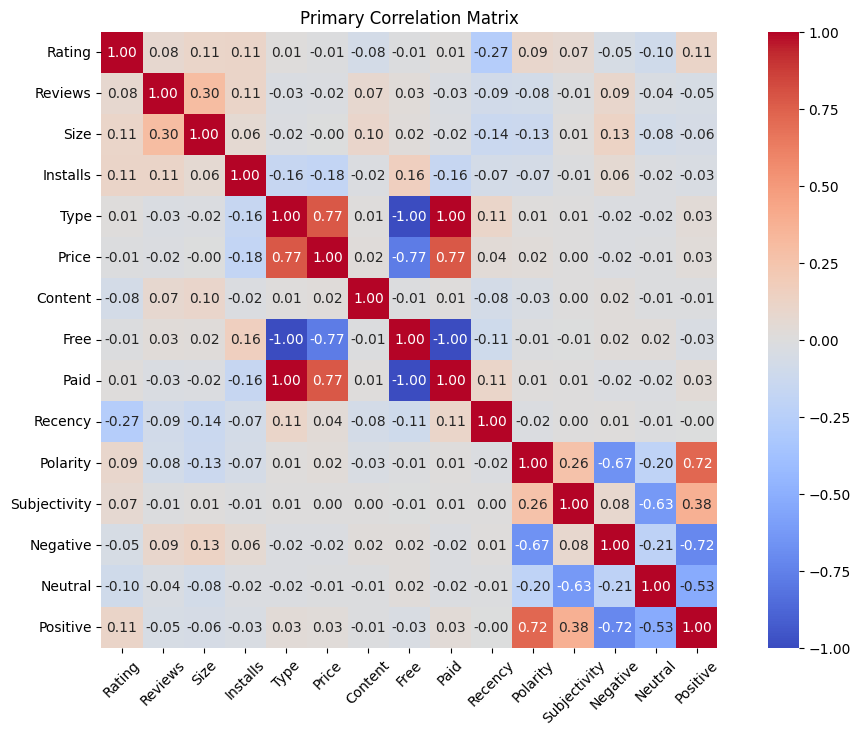

In [173]:
fig, ax = plt.subplots(figsize = (13, 8)) #13x8 inches
sns.heatmap(appInfo.corr(), annot = True, cmap = 'coolwarm', square = True, fmt = '.2f')#annot prints values in squares, fmt rounds off to two places
ax.set_title('Primary Correlation Matrix')
plt.xticks(rotation = 45) #rotation of x axis labels
plt.yticks(rotation = 0)
plt.show()

**This correlation matrix seems to suggest that a lot of features are correlated to each other. However, some of these correlations aren't worth looking into because they would be tangential. Also, it is too crowded for focused analysis.**

**Also, using only this correlation matrix for the entire analysis would be short-sighted.**

**I'll supplement this correlation matrix with more focused findings facilitated by other visualization methods.**

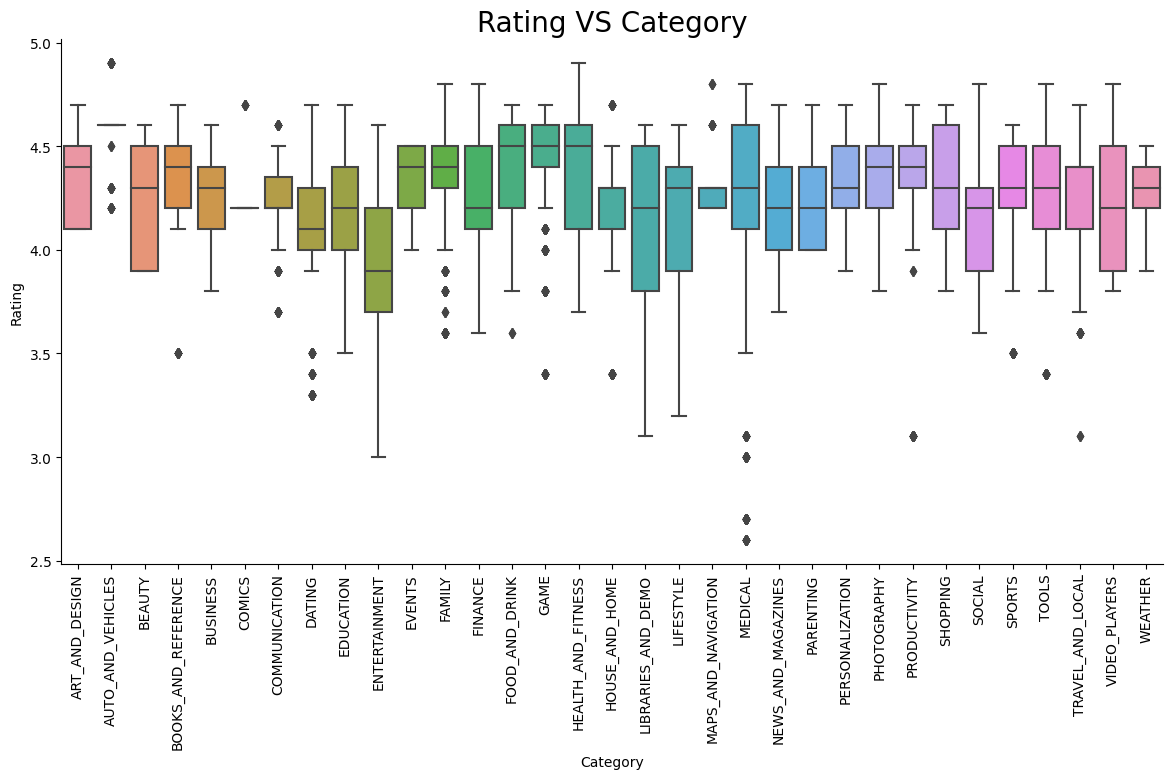

In [174]:
#category plots to see how ratings vary across categories
ratVScat = sns.catplot(x = 'Category', y = 'Rating', data = appInfo, kind = 'box', height = 6, aspect = 2)
ratVScat.set_xticklabels(rotation=90)
ratVScat.set_ylabels('Rating')
plt.title('Rating VS Category', size=20)
plt.show()

**Taking a look at the plot, it is evident that ratings across categories do not vary by a lot.**

**However, there are two worthwhile observations. The first is the fact that apps in the**
1. **ART_AND_DESIGN**
2. **EVENTS**
3. **PARENTING**
**categories are rated higher on average than apps from other categories.**

**The second is that, again apps in the ART_AND_DESIGN and PARENTING CATEGORIES top quartile apps are few in number, indicating that it's almost insurmountable to capture the enthusiast-tier user share in those categories.** 

<Figure size 1000x1000 with 0 Axes>

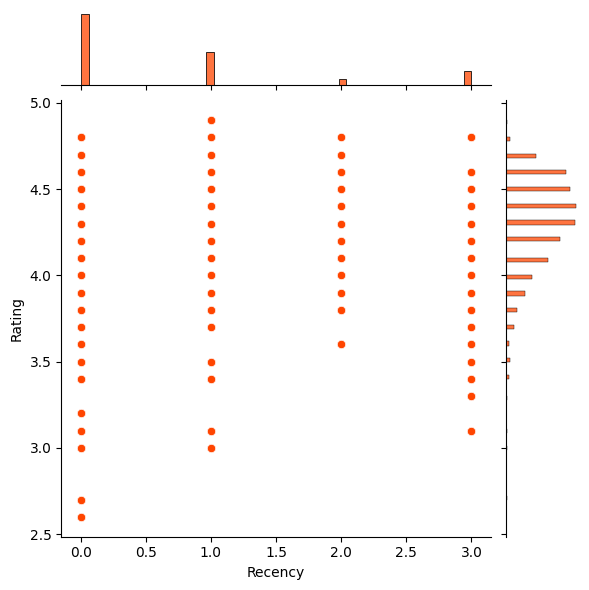

In [175]:
plt.figure(figsize = (10,10))
sns.jointplot(x = "Recency", y = "Rating", color = 'orangered', data = appInfo)

**This chart may seem a bit misleading at first, but becomes intuitive with some context.**

**The recency metric measures how long ago an app's latest update was pushed, with 1 being a very recent update and 3 implying that the app is, more or less, a legacy app.**

**The chart suggests that apps that have received a recent update tend to be rated higher than apps that receive updates once in a blue moon.**

**However, there is a caveat: the data in the dataset was a fixed date, i.e. information about apps' update cycles wasn't furnished, and thus the dataset can't paint a clear picture, only an assumption.**

In [176]:
#apps belonging to multiple genres were creating a bit of a stir
appInfo['Genres'] = appInfo['Genres'].str.split(';').str[0]

Text(0.5, 1.0, 'Rating vs Genres')

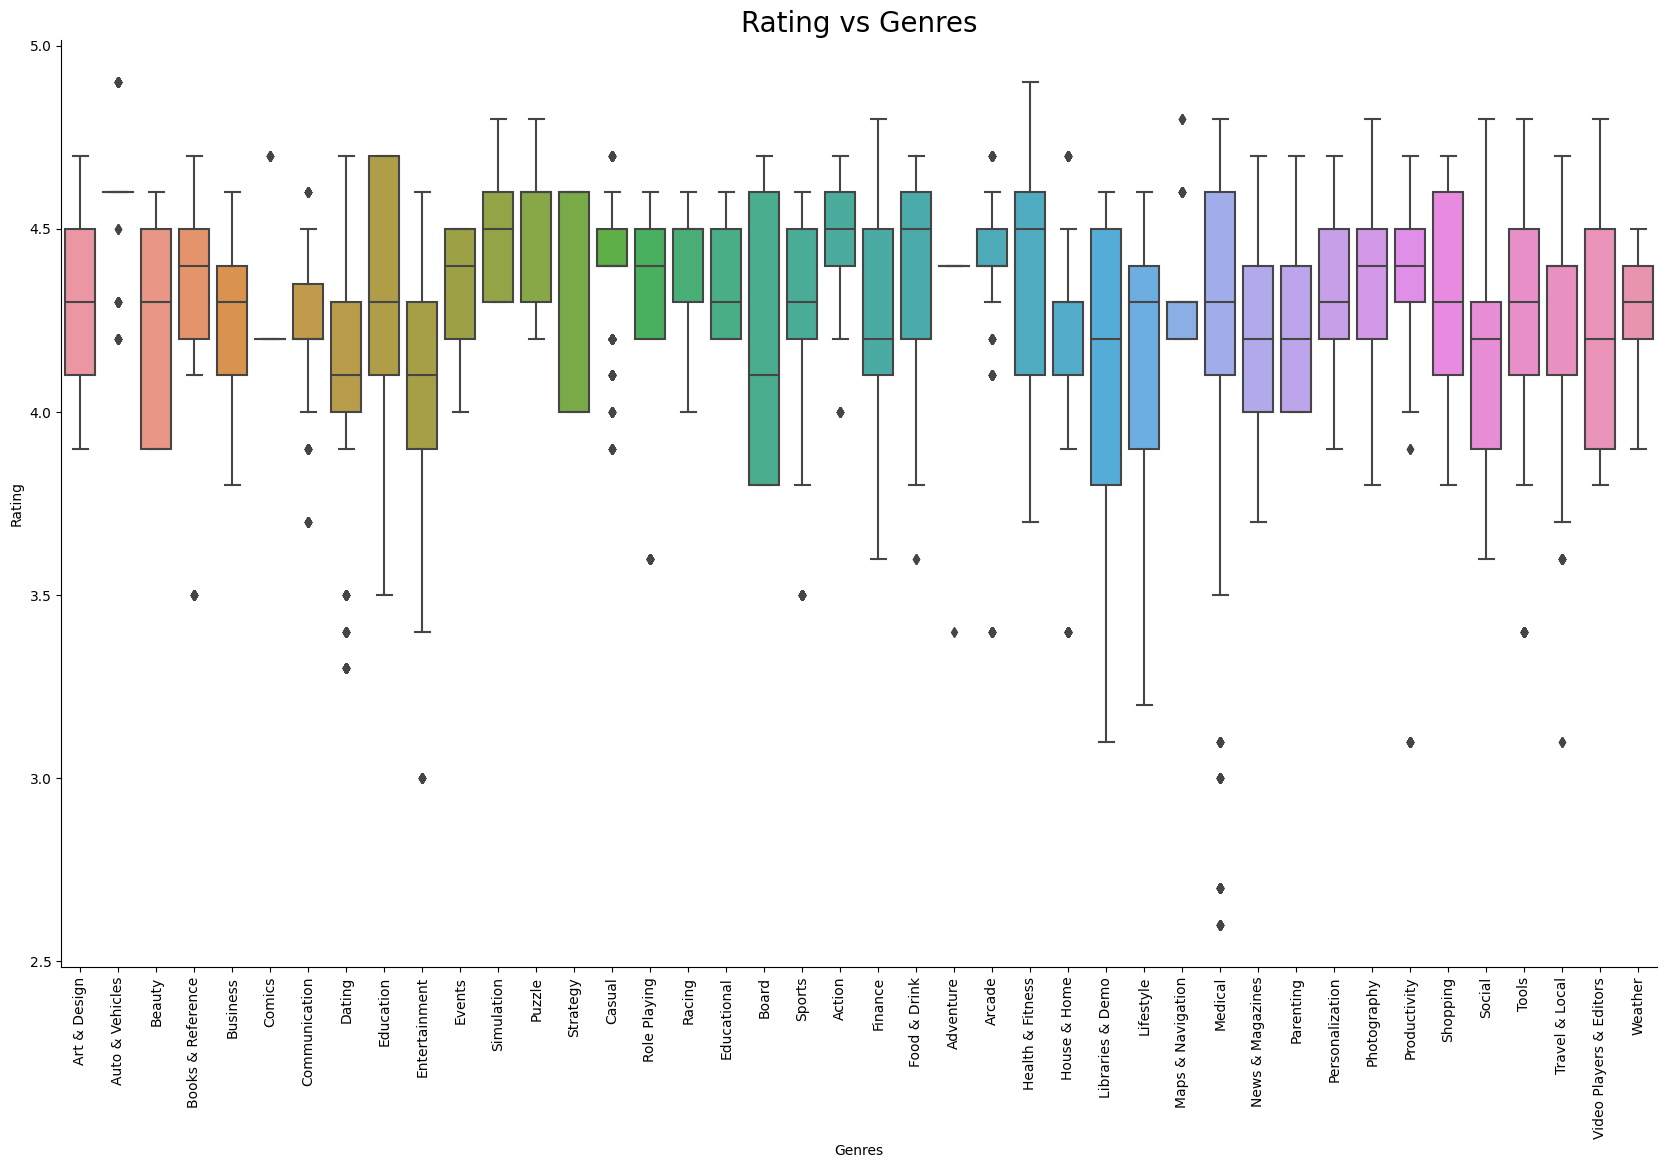

In [177]:
genVSrat = sns.catplot(x = 'Genres', y = 'Rating', kind = 'box', data = appInfo, height = 10, aspect = 1.7)
genVSrat.set_xticklabels(rotation = 90)
genVSrat = genVSrat.set_ylabels('Rating')
plt.title('Rating vs Genres',size = 20)



**The chart shows that there is quite a lot variance in app ratings across different app genres.**

**There are also a few genres that have a lot of contention, making forays into these genres challenging for developers.**

**There is a mild positive relationship between the ratings of apps and how many installs they get.**

**The more installs an app gets, the higher its average rating becomes.**

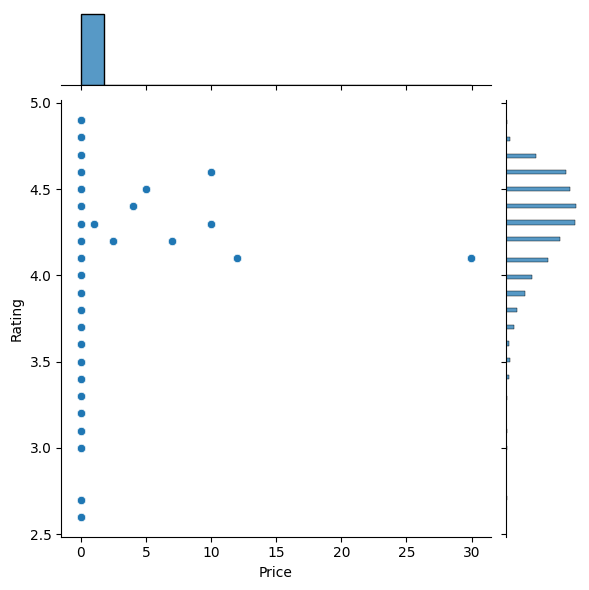

In [178]:
sns.jointplot(x = appInfo.Price, y = appInfo.Rating)

**The price of an app does have an effect on its rating. While the ratings of apps that are free are all over the place, as expected, it seems that users tend to expect more from a paid app and will likely rate it negatively if it fails to meet their expectations.**

<Figure size 1500x1500 with 0 Axes>

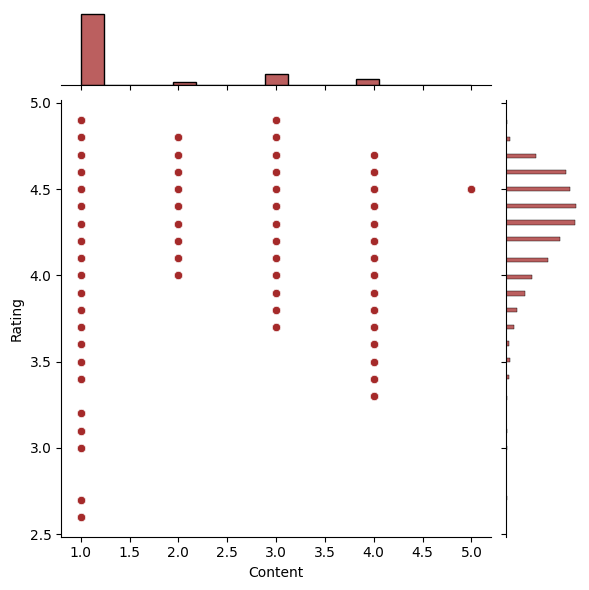

In [179]:
plt.figure(figsize = (15,15))
sns.jointplot(x = 'Content', y = 'Rating', data = appInfo, color = 'brown')

**This chart shows that as the level of restriction of an app increases (content rating), rating tends to fall.**

**This might be because older user demographics tend to assess an app more critically, while young users don't pay much heed to it and rate an app higher on average.**

Text(0.5, 1.0, 'Installs vs Price')

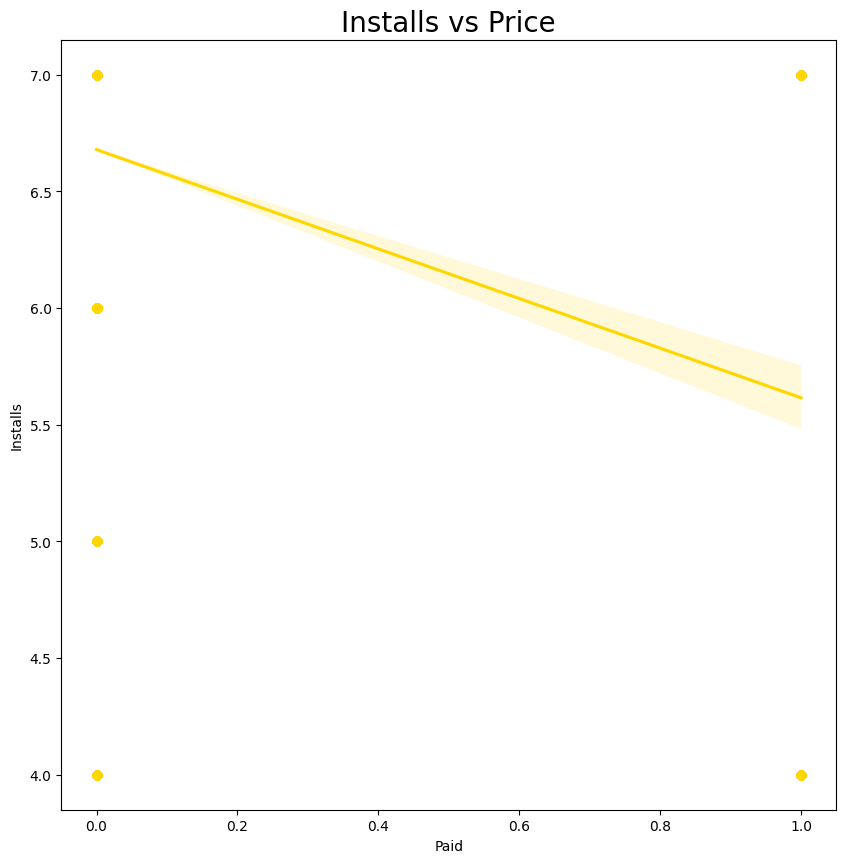

In [180]:
plt.figure(figsize = (10,10))
sns.regplot(x = 'Paid', y = 'Installs', data = appInfo, color = 'gold');
plt.title('Installs vs Price', size = 20)

**The strength of app installs becomes dubious when it comes to paid apps. A price tag is a very visible, immediate barrier to entry, and turns people away from the idea of using an app.**

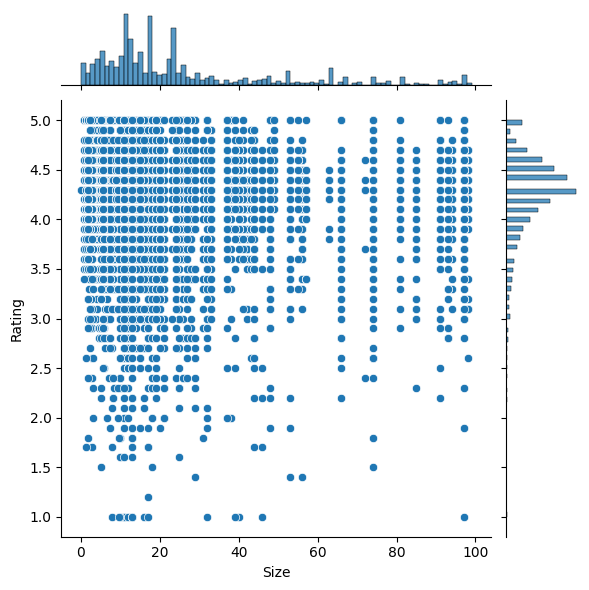

In [181]:
ax = sns.jointplot(x = appInfo['Size'], y = appData['Rating'])

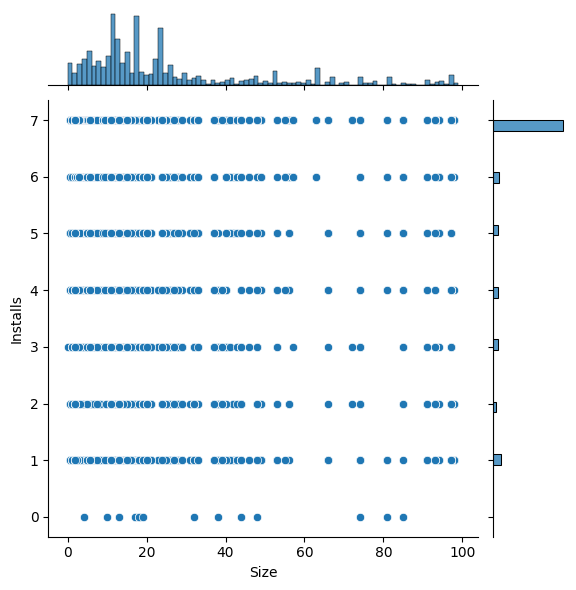

In [182]:
ax = sns.jointplot(x = appInfo['Size'], y = appData['Installs'])

**Most apps with the highest ratings are in the 2MB - 40MB ballpark. This is indicative of a real-world tendency - users from countries where mobile data is the primary way of accessing internet are careful with the sizes of apps they download.**

# Conclusion

The intention behind my solution to the assignment was to figure out what drove users to rate apps highly and what drove up installs.


The accuracy of my solution is limited only by constraints imposed by the methods I employed to clean/encode data, and a shortfall in the quantity of data.


1. The timeliness of updates influences ratings.  
* The first thing that comes to mind is a standout, unique, and LOUD feature that is a part of the app's identity. But it isn't that.
The best app is one people don't think twice about using - it blends into the background, becomes as natural as breathing. 
* A real-world example is WhatsApp. Nobody thinks twice before using WhatsApp. Some people do, but not nearly enough to make a difference. Such an app keeps stability at the forefront of the user experience.
* And, an app that gets updates regularly and tries to be on the bleeding edge in terms of stability gets high ratings.
* This is a roundabout way of saying that the frequency of an app's updates as well as their recency is closely linked to how well people rate it.

2. Users have higher expectation from paid apps than they do from free apps.
* A price tag, more often than not, turns people away from using an app. 
* However, when users do purchase an app, they have high expectations from it, and rate apps poorly if they don't conform to their expectations.



3. What drives installs?
* When a developer puts a price on their app - it puts up a very distinct, often unfriendly barrier to entry.
* What could have been a gentle way to coax people into a larger ecosystem of paid features or services is impeded by a paywall.
* As a result, 
* Free apps get more installs. 



In [183]:
time.time() - start

36.802308797836304